This Jupyter [Julia](http://julialang.org/) notebook is a direct translation of Chapter 1 of

>D. J. Higham and N.J. Higham.  
>[MATLAB Guide](http://bookstore.siam.org/ot92/), Second edition,  
>Society for Industrial and Applied Mathematics, Philadelphia, PA, USA,  
>2005, ISBN 0-89871-578-4

with MATLAB code converted to equivalent Julia code. There are a small number of additions in the text to address Julia differences and additions.  A full description of the Julia language can be found at Readthedocs [here](http://julia.readthedocs.org/en/latest/manual/).   It is also useful to read about [noteworthy differences](http://docs.julialang.org/en/latest/manual/noteworthy-differences/#noteworthy-differences-from-matlab) between Matlab, R, and Python as compared to Julia.  The original paper describing the Julia language can be found [here.](http://www-math.mit.edu/~edelman/homepage/papers/juliafast.pdf)  [IPython](http://ipython.org/) , from which the IJulia project evolved, is discussed in reference [2] and is currently evolving again to [Project Jupyter](http://jupyter.org/)

I have had better results rendering LaTeX using the hosted nbview. You can view that by clicking on this link:

https://nbviewer.jupyter.org/github/macd/dbm_notebooks/blob/master/julia_chap1_matlab_guide.ipynb

One way to install Julia and supporting software is to first install [anaconda](http://continuum.io/downloads) which installs a Python environment which contains the plotting package **matplotlib** and the very useful **IPython shell** and **Jupyter Notebook** (which is what you are reading now). Then install Julia from [here](http://julialang.org/downloads/).  Finally, in the Julia shell type in **Pkg.add("PyPlot")** for plotting and **Pkg.add("IJulia")** for the Jupyter Notebook with a Julia backend, after the **julia>** prompt.  One of the examples uses the ordinary differential equation solver package "ODE", and that can be installed by **Pkg.add("ODE")**.  Once you have finished, you can start the Jupyter notebook server with the command **jupyter notebook**

All the errors here are, of course, mine.  If (or rather when) you find them, please let me know. In the meantime, I hope you find it useful.  

Don MacMillen:    don (sometimes) at macmillen dot net

# Chapter 1 A Brief Tutorial

The best way to learn Julia is by trying it yourself, and hence we begin with a whirlwind tour. Working through the examples below will give you a feel for the way that Julia operates and an appreciation of its power and ﬂexibility. 

The tutorial is entirely independent of the rest of the book—all the Julia features introduced are discussed in greater detail in the subsequent chapters. Indeed, in order to keep this chapter brief, we have not explained all the functions used here. You can use the index in [1] to ﬁnd out more about particular topics that interest you. 

We will be using the Julia interactive shell as well as the IJulia notebook (which is what you are reading now) throughout this tutorial.  You can install these by following the directions at [IPython install](http://ipython.org/install.html) (or see the instructions above). This tutorial contains commands for you to type at the Julia command line. Alternatively, if you are viewing this notebook in a "live" mode served from a local IJulia notebook server running with --profile=julia, you can directly modify any of the cells and rerun the cell.  Just be aware that in some cases you may need to choose the "Run All" option from the cell drop down menu to satisfy intercell dependences.

In the last part of this brief tutorial we give examples of script files and functions. These ﬁles are short, so you can type them in quickly or cut and paste them into an Julia shell, or you can just modify values in place in the IJulia notebook and re-evaluate the cell. You should experiment as you proceed, keeping the following points in mind. 

* Upper and lower case characters are not equivalent (Julia is case sensitive). 
* Typing the name of a variable will cause Julia to display its current value. 
* Julia uses parentheses, ( ), square brackets, [ ], and curly braces, { }, and these are not interchangeable. 
* In the Julia shell, the up arrow and down arrow keys can be used to scroll through your previous commands. Also, an old command can be recalled by typing the first few characters followed by up arrow. You can also use **ctrl-p** (type p while holding the control key down) to scroll back through the command history stack.  To move to the end of the line, type **ctrl-e**, to the beginning of the line **ctrl-a**.
* You can type ?(topic) to access online help on the command, function, or object topic. Note that hyperlinks, indicated by underlines, are provided that will take you to related help items and the Help browser. 
* If you press the tab key after partially typing a function or variable name, Julia will attempt to complete it, offering you a selection of choices if there is more than one possible completion. 
* You can quit Julia by typing exit() or quit() or ctrl-d.

Having entered the Julia command, you should work through this tutorial by typing in the text that appears after the prompt, **In [n]:** where n is a number which indicates the command's location in the command stack, in the command window. After showing you what to type, we display the output that is produced. We begin with arrays.  In native Julia arrays are lists denoted with the square bracket syntax.

In [1]:
a = [1 2 3]

1×3 Array{Int64,2}:
 1  2  3

If you type in the line listed in the box 'In[1]:' above into the Julia shell, then you will see the result listed in 'Out[1]:'

This example sets up a 1-by-3 array, which is also called a row vector.  In the next example, comma's separate the entries:

In [2]:
c = [4, 5, 6]

3-element Array{Int64,1}:
 4
 5
 6

The commas tell Julia to concantenate the scalars vertically, so **c** is a 3 element column vector. But notice that **c** has dimensions of (3,) while **a** has dimensions of (1,3) and this will be important below. Now you can multiply the arrays a and c:

In [3]:
a * c

1-element Array{Int64,1}:
 32

Here, you performed an inner, or dot product, of the two vectors.  Notice that in this example, the product **a\*c** was not explicitly assigned to any variable.  When there is no explicit assignment, Julia automatically assigns the result of the expression to the variable named **ans** (short for answer) **but only in the interactive shell** as you can see by the following:

In [4]:
ans

1-element Array{Int64,1}:
 32

Inputs to Julia functions are speciﬁed after the function name and within parentheses. You may also form the outer product:

In [5]:
A = c * a

3×3 Array{Int64,2}:
 4   8  12
 5  10  15
 6  12  18

Here the answer is a 3-by-3 array that has been assigned to **A**.

The product **a \* a**, is not defined, since the dimensions are incompatible for matrix multiplication:

In [6]:
a * a

LoadError: LoadError: DimensionMismatch("matrix A has dimensions (1,3), matrix B has dimensions (1,3)")
while loading In[6], in expression starting on line 1

Arithmetic operations on matrices and vectors come in two distinct forms. Matrix sense operations are based on the normal rules of linear algebra and are obtained with the usual symbols **+, -, \*, /,** and **^**. Array sense operations are deﬁned to act elementwise and are generally obtained by preceding the symbol with a dot.  Thus if you want to square each element af a you can write.

In [7]:
b = a .^ 2

1×3 Array{Int64,2}:
 1  4  9

Julia has many mathematical functions that operate in the array sense when given a vector or matrix argument.  For example,

In [ ]:
exp(a)

In [ ]:
log(ans)

In [ ]:
sqrt(a)

By default, Julia uses a heuristic to determine the number of decimal digits to display, but always stores numbers and computes to the equivalent of 16 decimal digits.

Large or small numbers are displayed in exponential notation, with a power of 10 scale factor preceded by e.  Note that in this next example the 24. (24 followed by a dot) is necessary since Julia will throw an error if exponentiating an integer to a negative integer power.

In [ ]:
2 ^ -24.

Various data analysis functions are also available.  

In [ ]:
sum(b), mean(c)

As this example shows, you may include more than one command on the same line by separating them with commas.  If a command is followed by a semicolon then Julia suppresses the output.  Note that semicolons are **not** needed at the end of lines in scripts and are discouraged there by the style guidelines.

In [ ]:
pi

In [ ]:
y = tan(pi/6);

The variable pi is a permanent variable with value $\pi$. The variable *ans* always contains the most recent unassigned expression, so after the assignment to y, *ans* still holds the Value $\pi$.

You may set up a two dimensional array by using spaces to separate entries within a row and semicolons to separate rows:

In [ ]:
B = [-3  0 -1; 2  5 -7; -1  4  8]

At the heart of Julia is a powerful range of linear algebra functions. For example, recalling that c is a 3-by-1 Vector, you may wish to solve the linear system $B * x = c$. This can be done with the backslash operator:

In [ ]:
x = B\c

3-element Array{Float64,1}:
 -1.29954 
  1.37788 
 -0.101382

You can check the result by computing the Euclidean norm of the relative residual:

In [ ]:
norm(B*x - c) / (norm(B) * norm(x))

9.651308470608712e-17

While nonzero because of rounding errors in the computations, this residual is about as small as we can expect, given that Julia computes to the equivalent of about 16 decimal digits.

The eigenvalues of B can be found using _eig_:

In [ ]:
e = eig(B)

(Complex{Float64}[-3.13605+0.0im,6.56803+5.10454im,6.56803-5.10454im],
Complex{Float64}[0.982903+0.0im -0.0385442-0.0392755im -0.0385442+0.0392755im; -0.126565+0.0im -0.800527+0.0im -0.800527-0.0im; 0.133724+0.0im 0.168308+0.572539im 0.168308-0.572539im])

Notice two things about this code snippet.  First, eig returns both the eigenvalues and the eigenvectors. Also the solution shows that **im** is the imaginary unit, $\sqrt{-1}$.  You may also specify two output arguments for the function eig:

In [ ]:
(D, V) = eig(B)

(Complex{Float64}[-3.13605+0.0im,6.56803+5.10454im,6.56803-5.10454im],
Complex{Float64}[0.982903+0.0im -0.0385442-0.0392755im -0.0385442+0.0392755im; -0.126565+0.0im -0.800527+0.0im -0.800527-0.0im; 0.133724+0.0im 0.168308+0.572539im 0.168308-0.572539im])

In [ ]:
D

3-element Array{Complex{Float64},1}:
 -3.13605+0.0im    
  6.56803+5.10454im
  6.56803-5.10454im

In [ ]:
V

3×3 Array{Complex{Float64},2}:
  0.982903+0.0im  -0.0385442-0.0392755im  -0.0385442+0.0392755im
 -0.126565+0.0im   -0.800527+0.0im         -0.800527-0.0im      
  0.133724+0.0im    0.168308+0.572539im     0.168308-0.572539im 

The columns of V are the eigenvectors of B while the values in D are the eigenvalues.  Note that the returned arguments are in reversed order from the MATLAB version of eig.

The colon notation is useful for constructing vectors of equally spaced values. For example,

In [ ]:
v = collect(1:6)

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

This is different from MATLAB.  If we had just used the notation **1:6** (that is, use no square brackets) we would have set **v** to a range object.  By using the square brackets, we are using a comprehension to obtain the vector specified by the range.

To quote the Julia [manual](http://julia.readthedocs.org/en/latest/manual/), "Comprehensions provide a general and powerful way to construct arrays. Comprehension syntax is similar to set construction notation in mathematics"  In the following, we see a one line function definition that takes to arguments and returns a single value.  Notice that we have written **3y** instead of **3\*y**.  In many instances we can skip the star between a constant factor and the expression it is multiplying for cleaner looking code.  The comprehension appears on the right hand side of the assignment to **g**.

In [ ]:
f(x, y) = x^2 +3y
g = [f(i, j) for i=1:3, j=2:5]

3×4 Array{Int64,2}:
  7  10  13  16
 10  13  16  19
 15  18  21  24

Generally, **collect(m:n)** generates the vector with entries m, m+1, ... , n.  Nonunit increments can be specified with m:s:n syntax where s is the step size.

In [ ]:
y = collect(2:3:10)

3-element Array{Int64,1}:
 2
 5
 8

In [ ]:
y = collect(1:-0.25:0)

5-element Array{Float64,1}:
 1.0 
 0.75
 0.5 
 0.25
 0.0 

You may construct big matrices out of smaller ones by following the conventions that (a) square brackets enclose and array, (b) spaces separate entries in a row, and (c) semicolons separate rows.

In [ ]:
C = [A; [8 9 10]]

4×3 Array{Int64,2}:
 4   8  12
 5  10  15
 6  12  18
 8   9  10

In [ ]:
D = [B; a]

4×3 Array{Int64,2}:
 -3  0  -1
  2  5  -7
 -1  4   8
  1  2   3

The element in row **i** and column **j** of the matrix **C** (where **i** and **j** always start at 1) can be accessed as **C[i, j]**.

In [ ]:
C[2, 3]

15

More generally, **C[i1:i2, j1:j2]** picks out the submatrix formed by the intersection of rows **i1** to **i2** and columns **j1** to **j2**.

In [ ]:
C[2:3, 1:2]

2×2 Array{Int64,2}:
 5  10
 6  12

You can build certain types of matrices automatically. For example, identities and matrices of zeros and ones can be constructed with eye, zeros, and ones:

In [ ]:
I3 = eye(3)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [ ]:
Y = zeros(3, 5)

3×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [ ]:
Z = ones((2,2))

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

Note that the functions **zeros** and **ones** can take either a single integer argument, which results in a one dimensional array; a single array argument, which results in a multi dimensional array of size specified by the array; or muliple integer arguments, one specifying the size of each dimension of the resulting array.

The functions **rand** and **randn** work in a similar way, generating random entries from the uniform distribution over [0, 1] and the normal (0, 1) distribution, respectively.  The numbers generated depend on the seed of the random number generator (rng).  By explicitly setting the seed, you can make your experiments repeatable.  The function to set the seed is **srand**.

In [ ]:
srand(20)
F = rand(3, 3)

3×3 Array{Float64,2}:
 0.41409   0.43761    0.698962
 0.977533  0.0782563  0.573936
 0.524623  0.0866527  0.958093

In [ ]:
G = randn(1, 5)

1×5 Array{Float64,2}:
 -1.65383  -0.882998  0.368599  -0.0985324  2.58621

At this point several variables have been created in the workspace.  You can obtain a list with the whos() command.

In [ ]:
whos()

                             A     72 bytes  3×3 Array{Int64,2}
                             B     72 bytes  3×3 Array{Int64,2}
                          Base  35327 KB     Module
                             C     96 bytes  4×3 Array{Int64,2}
                        Compat   5476 KB     Module
                          Core  12998 KB     Module
                             D     96 bytes  4×3 Array{Int64,2}
                             F     72 bytes  3×3 Array{Float64,2}
                             G     40 bytes  1×5 Array{Float64,2}
                            I3     72 bytes  3×3 Array{Float64,2}
                        IJulia   6796 KB     Module
                IPythonDisplay   1927 bytes  Module
                          JSON   5557 KB     Module
                          Main  42420 KB     Module
                        Nettle   5491 KB     Module
                             V    144 bytes  3×3 Array{Complex{Float64},2}
                             Y    120 bytes  3×5 Array{

Like most languages Julia has loop contructs.  The following example uses a for loop to evaluate the continued fraction  $\cfrac{1}{1+\cfrac{1}{1+\cfrac{1}{1+\cfrac{1}{1+\cfrac{1}{1+\cfrac{1}{1 + \cfrac{1}{1 + \cfrac{1}{1 + \cfrac{1}{1 + \cfrac{1}{1}}}}}}}}}}$


which approximates the golden ratio, (1 + $\sqrt{5}$)/2. The evaluation is done from the bottom up:

In [ ]:
g = 2.
for k=1:10
    g = 1 + 1 / g
end
g

1.6180555555555556

Which we can check with the predefined **golden** constant.

In [ ]:
golden

φ = 1.6180339887498...

Loops involving the while statement can be found later in this tutorial.

The plot function from the matplotlib module pylab produces two dimensional pictures.  You can access these ploting and graphics functions with the **using PyPlot** statement, which imports the names of the **PyPlot** module into the current scope.

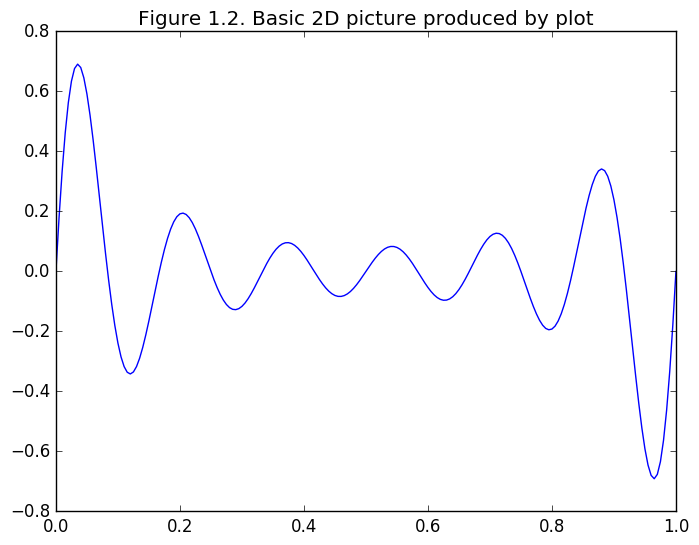

In [ ]:
# Import plotting functions into current namespace
using PyPlot
t = collect(0:0.005:1.00)
z = exp(10t .* (t - 1)) .* sin(12pi * t)
plot(t, z)
title("Figure 1.2. Basic 2D picture produced by plot")

Here, plot(t, z) joins the points t[i], z[i] using the default solid linetype.  Matplotlib opens a figure window in which the picture is displayed.  In this IJulia notebook, the matplotlib figures are included 'in line'.  When you are using the Julia REPL (read, evaluate, print loop) as a command line interpreter, after opening a plot figure window, you can close it in the normal way, ie by clicking on the x in the window title bar.

You can produce a histogram with the function hist.  Note that we had to use **import PyPlot.plt** and then use the unusual syntax plt[:hist] in order to avoid a name collision with the built-in Julia hist method.

In [ ]:
import PyPlot.plt
plt[:hist](randn(1000))
PyPlot.title("Figure 1.3. Histogram produced by hist.")

Here, hist is given 1000 points from the normal (0, 1) random number generator

You are now ready for more challenging computations.  A random Fibonacci sequency {$x_{n}$} is generated by choosing $x_{1}$ and $x_{2}$ and setting

$$  x_{n + 1} = x_{n} \pm x_{n -1}, \; n \ge 2 $$

Here, the $\pm$ indicates that + and - must have equal probability of being chosen.  Viswanath [121] listed in [1] analyzed this recurrence and showed that, with probability 1, for large n the quantity $|x_{n}|$ increases like a multiple of $c^{n}$, where c = 1.13198824... (see also [25]).  You can test Viswanath's result as follows:

In [ ]:
# Random Fibonacci sequence
using PyPlot

srand(100)
m = 1000

x = zeros(m)
x[1:2] = [1 2]
for n in 2:m-1
    x[n + 1] = x[n] + sign(rand() - 0.5) * x[n - 1]
end

semilogy(1:m, abs(x))
c = 1.13198824
hold(true)
semilogy(1:m, c .^ (1:m))
title("Figure 1.4. Growth of a random Fibonacci sequence")
hold(false)

The for loop stores a random Fibonacci sequence in the array x; we preallocate x to the size needed and initialize to zero using the zeros() function. The semilogy function then plots n on the x-axis against $|X|$ on the y-axis, with logarithmic scaling for the y-axis. Typing hold(true) tells matplotlib to superimpose the next picture on top of the current one. The second semilogy plot produces a line of slope c. The overall picture, shown in Figure 1.4, is consistent with Viswanath’s theory.

We can make the above code into a command by writing it out to a file. If you cut and paste it into a file called fib.jl, you can then run it in the Julia REPL by typing "run fib" or "run fib.jl" to reproduce the above graph.

However, you can experiment directly in this IJulia notebook by changing any of the values and then hitting the 'play' button above.

Our next example involved the Collatz iteration, which, given a positive integer $x_{1}$, has the form $x_{k + 1} = f(x_{k})$, where

$$f(x) = \left\{
  \begin{array}{lr}
    3x + 1 & :  x \: \% \: 2 == 0\\
    x/2 & : x \: \% \: 2 == 1
  \end{array}
\right.
$$

Here $x \: \% \: y$ is the modulus function of x and y, which can also written as mod(x, y) in Julia.  It is the remainder of x when divided by y.  In this case $x \: \% \: 2 == 0$, if true, means that x is even and if $x \: \% \: 2 == 1$ is true, then x is odd.  Note that these are perfectly good Julia functions

In [ ]:
x = 3
if x % 2 == 0
    println("x is even")
else
    println("x is odd")
end

But now returning to our quest, the equation above in words means:
if $x$ is odd, replace it by $3x + 1$, and if $x$ is even, halve it. It has been conjectured that this iteration will always lead to a value of 1 (and hence thereafter cycle between 4, 2, and 1) whatever starting value $x_{1}$ is chosen. There is ample computational evidence to support this conjecture, which is variously known as the Collatz problem, the $3x + 1$ problem, the Syracuse problem, Kakutani’s problem, Hasse’s algorithm, and Ulam’s problem. However, a rigorous proof has so far eluded mathematicians. For further details, see [63] listed in [1] or type “Collatz problem” into your favorite Web search engine. You can investigate the conjecture by creating the Julia script ﬁle collatz.jl shown below. In this file a while loop and an if statement are used to implement the iteration. You can run this in the notebook simply by changing the value of n and hitting the play button.  Or, you can save this to a file named collatz.jl (remembering to uncommment out the line '\#print... and commenting out the line "n = 27". Then, from the **julia>** repl prompt, type "run collatz". The input command prompts you for a starting value. The appropriate response is to type an integer and then hit return.

In [ ]:
#COLLATZ Collatz iteration. 
using PyPlot

#print("Enter an integer bigger than 2: "); n = int(chomp(readline()))
init_n = n = 27;
narray = zeros(1000)  # only a maximum of 1000 iterations
narray[1] = n;
count = 0;
while n != 1
    if n % 2 == 1  # Remainder modulo 2. 
        n = 3 * n + 1;
    else
        n = n / 2;
    end
    count += 1
    narray[count] = n  # Store the current iterate
end

# Plot with * marker and solid line style.
# Only plot the non zero entries in narray
plot(narray[narray .!= 0], "*-")
title("Figure 1.5. Collatz iteration starting at $init_n")

A couple of things you should note about the code above.  This first is that it will fail if the number of iterations goes beyond 1000.  For most of the inputs I have tried, it 'converged' in under 200 iterations.  But you should try to break it!  The second thing to note is that we only want to plot the non zero values.  All the zero values at the end of the array add no new information and we want to drop them.  That is easily accomplished by using the narray[narray .!= 0] syntax which selects only the non-zero values out of narray.

To investigate the Collatz problem further, the script collbar in the next listing plots a bar graph of the number of iterations required to reach the value 1, for starting Values 1,2,. . . ,29. The result is shown in Figure 1.6. For this picture, the function plt.grid adds grid lines that extend from the axis tick marks, while plt.title, plt.xlabel, and plt.ylabel add further information. 

In [ ]:
#COLLBAR Collatz iteration bar graph.
using PyPlot

N = 29 # Use starting values 1,2,...,N.
niter = zeros(N);  # Preallocate array.
for i in 1:N
    count = 0;
    n = i + 1;
    while n != 1
        if n % 2 == 1
            n = 3 * n + 1;
        else
            n = n / 2;
        end
        count += 1;
    end
    niter[i] = count;
end

left = 1:N;
bar(left, niter) # Bar graph.
grid()   # Add horizontal and vertical grid lines.
title("Figure 1.6. Collatz iteration counts")
xlabel("Starting value") # Label X-axis.
ylabel("Number of iterations")  #Label y-axis.

The Well-known and much studied Mandelbrot set can be approximated graphically in just a few lines of Julia. It is deﬁned as the set of points c in the complex plane for which the sequence generated by the map $z \mapsto z^{2} + c$, starting with $z = c$, remains bounded [91, Chap. 14] listed in [1]. The script mandel in the next listing produces the plot of the Mandelbrot set shown in Figure 1.7. The script contains calls to linspace of the form linspace (a, b ,n), which generate an equally spaced vector of n values between a and b. The repmat function repeats(z, m, n) repeats a matrix z m-times in the first dimension and n-times in the second dimension. The **complex** function is used to construct a matrix C that represents the rectangular region of interest in the complex plane. Using **complex** is generally faster than using a + 1im\*b.  The plot itself is produced by **contourf**, which plots a ﬁlled contour. The expression $abs(Z)<Z\_max$ in the call to contourf detects points that have not exceeded the threshold Z_max and that are therefore assumed to lie in the Mandelbrot set. You can experiment with mandel by changing the region that is plotted, via the **linspace** calls, the number of iterations **it_max**, the threshold **Z_max**, as well as the density of the grid **mc**.

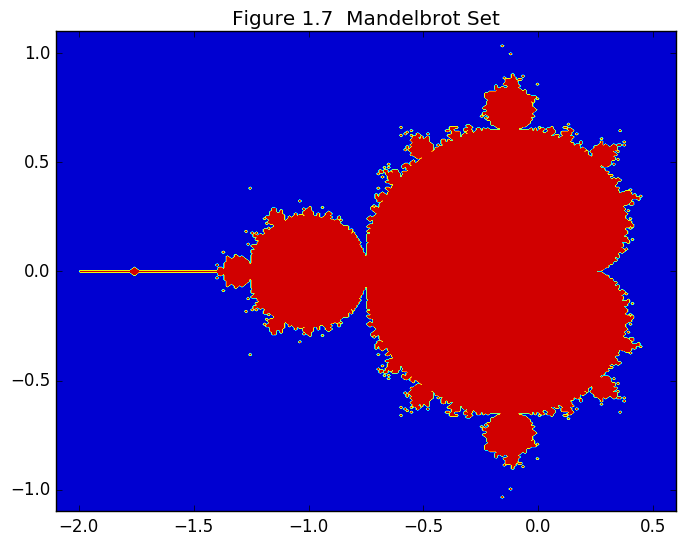

In [ ]:
#MANDEL Mandelbrot set.
using PyPlot

mc = 301

x = linspace(-2.1, 0.6, mc)'
y = linspace(-1.1, 1.1, mc)
C = complex(repmat(x, mc), repmat(y, 1, mc))

Z_max = 1e6
it_max = 50
Z = C

for k in 1:it_max
    Z = Z .^ 2 + C
end

contourf(x, y, (abs(Z) .< Z_max))
title("Figure 1.7  Mandelbrot Set")

Next we solve the ordinary differential equation (ODE) system

$$   d/dt \; y_{1}(t) =  10 (y_{2}(t) - y_{1}(t)),$$
$$ $$
$$   d/dt \; y_{2}(t) =  28 y_{1}(t) - y_{2}(t) - y_{1}(t) y_{3}(t),$$
$$ $$
$$   d/dt \; y_{3}(t) = y_{1}(t) y_{2}(t) - 8 y_{3}(t) / 3.  $$

This is an example from the Lorenz equations family; see [H1] listed in [1]. We take initial conditions y(0) = [0, 1, 0] and solve over $0 \le t \le 50$. The next listing includes a Julia function definition lorentzde. Given t and y, this function returns the right-hand side of the ODE as the vector **yprime**. This is the form required by Julia’s ODE solving functions. The rest of the listing uses the Julia function **ode45** to solve the ODE numerically and then produces the (y1, y3) phase plane plot shown in Figure 1.8. You can try different values of the constants defining the derivatives to see what happens.  For instance, change the 3 to an 8 in lorenzde and observe how the plot changes

In [ ]:
using ODE
using PyPlot

function lorenzde(t, y)
    # LORENZDE Lorenz equations.
    # YPRIME = LORENZDE(T, Y)
    yprime = [(10(y[2] - y[1])),  (28y[1] - y[2] - y[1] * y[3]),
                       (y[1] * y[2] - 8y[3] / 3.)]
    return yprime
end

#lrun    ODE solving example:  Lortez.

tspan = [0, 50]           # solve for 0 <= t <= 50
yzero = [0., 1., 0.]     # initial condition

tout, y = ode45(lorenzde, yzero, tspan)

# ode45 returns a vector of vectors rather than a multidimensional array
# and we must repack
ys = hcat(y...).'

plot(ys[:, 1], ys[:, 3])
xlabel("y_1")
ylabel("y_3")
title("Figure 1.8  Lorenz equations")

Now we give an example of a recursive function, that is, a function that calls itself. The Sierpinski gasket [90, Sec. 2.2] listed in [1] is based on the following process. Given a triangle with vertices $P_{a}$, $P_{b}$, and $P_{c}$, We remove the triangle with vertices at the midpoints of the edges, $(P_{a} + P_{b})/2$, $(P_{b} + P_{c}) / 2$, and $(P_{c} + P_{a}) / 2$. This removes the “middle quarter” of the triangle, as illustrated in Figure 1.9. (The code in the function 'gasket' will be explained below)

In [ ]:
import PyPlot.plt

function gasket(pa, pb, pc, level)
    #=
    GASKET Recursively generated Sierpinski gasket. 
    GASKET(PA, PB, PC, LEVEL) generates an approximation to 
    the Sierpinski gasket, where the 2-vectors PA, PB, and PC Z define the triangle vertices. 
    LEVEL is the level of recursion.
    =#
    if level == 0
        # Fill the triangle with vertices Pa, Pb, Pc. 
        plt[:fill]([pa[1], pb[1], pc[1]], [pa[2], pb[2], pc[2]], "g") 
        hold(true)
    else
        # Recursive calls for the three subtriangles. 
        gasket(pa, (pa + pb) / 2., (pa + pc) / 2., level - 1) 
        gasket(pb, (pb + pa) / 2., (pb + pc) / 2., level - 1) 
        gasket(pc, (pc + pa) / 2., (pc + pb) / 2., level - 1)
    end
end

pa = [0, 0]
pb = [1, 0]
pc = [0.5, sqrt(3)/2.]
level = 1
gasket(pa, pb, pc, level)
hold(false)
PyPlot.title("Figure 1.9  Gasket level = 1")
PyPlot.axis("equal")

Effectively, we have replaced the original triangle with three “subtriangles”. We can now apply the middle quarter removal process to each of these subtriangles to generate nine subsubtriangles, and so on. The Sierpinski gasket is the set of all points that are never removed by repeated application of this process. The function gasket in the listing above implements the removal process. The input arguments $P\_{a}$, $P\_{b}$, and $P\_{c}$ deﬁne the vertices of the triangle and level speciﬁes how many times the process is to be applied. If level is nonzero then gasket calls itself three times with level reduced by 1, once for each of the three subtriangles. When level ﬁnally reaches zero, the recursion 'bottoms-out' and the appropriate triangle is drawn. The following code generates Figure 1.10.

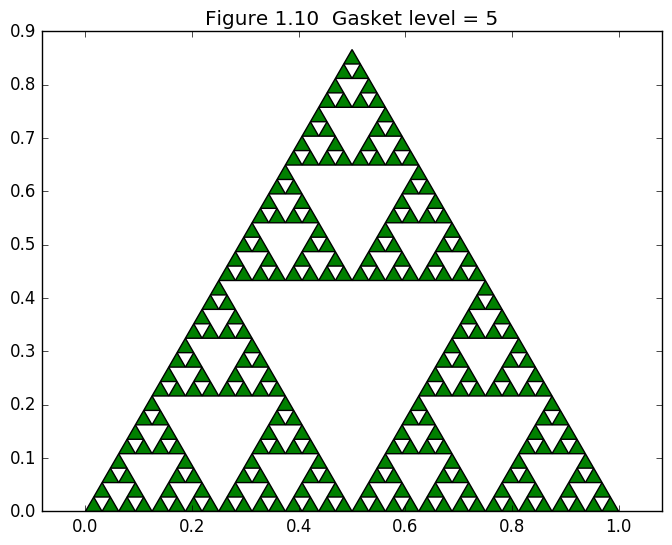

(0.0,1.0,0.0,0.9)

In [ ]:
level = 5
gasket(pa, pb, pc, level)
PyPlot.hold(false)
PyPlot.title("Figure 1.10  Gasket level = 5")
PyPlot.axis("equal")

(Figure 1.9 was generated in the same way with level = 1.) In the last line, the call to axis makes the units of the $x-$ and $y—$axes equal and turns off the axes and their labels. You should experiment with different initial Vertices $P_{a}$, $P_{b}$, and $P_{c}$, and diiferent levels of recursion, but keep in mind that setting level bigger than 8 may overstretch either your patience or your computer’s resources.

The Sierpinski gasket can also be generated by playing Barnsley’s “chaos game” [90, Sec. 1.3] listed in [1]. We choose one of the vertices of a triangle as a starting point. Then we pick one of the three vertices at random, take the midpoint of the line joining this vertex with the starting point and plot this new point. Then we take the midpoint of the line joining this point and a randomly chosen vertex as the next point, which is plotted, and the process continues. The script barnsley in Listing 1.8 implements the game. Figure 1.11 shows the result of choosing 1000 iterations: 

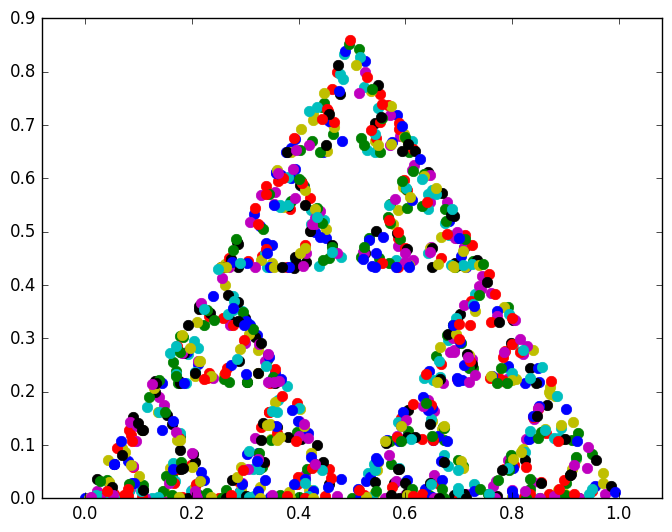

In [ ]:
#BARNSLEY Barnsley’s game to compute Sierpinski gasket. 

using PyPlot

srand(1)                    # and (re)set the seed

V = [0 1 0.5; 0 0 sqrt(3)/2] # Columns give triangle vertices. 
point = V[:, 1]                    # Start at a Vertex. 

n = 1000     #  Change this number to experiment

for k=1:n
    node = ceil(Int, 3rand())   # node is 1, 2, or 3 with equal prob. 
    point = (V[:, node] + point)/2
    PyPlot.plot(point[1], point[2], ".", markersize=15) 
    PyPlot.hold(true)
end

PyPlot.axis("equal") 
PyPlot.hold(false)

Try experimenting with the number of points, $n$, the type and size of marker in the plot command, and the location of the starting point.

We ﬁnish with the listing of sweep, which generates a volume—swept three—dimensional (3D) object; see Figure 1.12. Here, the command surf (X,Y,Z) creates a 3D surface where the height Z[i, j] is speciﬁed at the point (X[i, j] ,Y[i, j]) in the x-y plane. The script is not written in the most obvious fashion, which would use two nested for loops. Instead it is vectorized. To understand how it works you will need to be familiar with Chapter 5 and 21.4 of reference [1]. You can experiment with the script by changing the parameter N and the function that determines the variable radius: try replacing sqrt by other functions, such as log, sin, or abs.

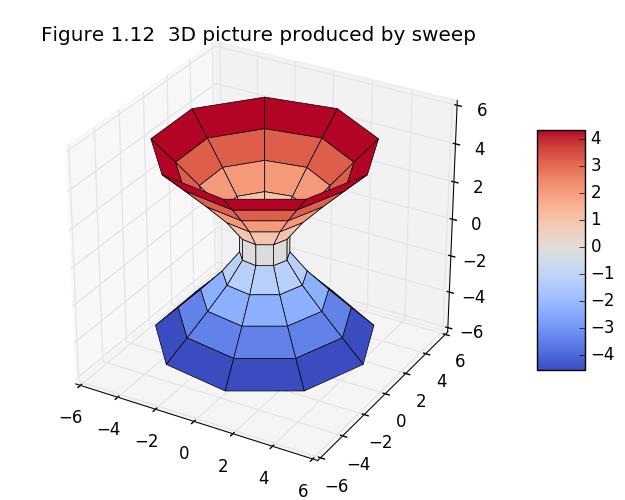

PyObject <matplotlib.text.Text object at 0x7fb71e8f64a8>

In [50]:
#  SWEEP   Generates a volume-swept 3D object.
using PyPlot

n = 10      # Number of increments - try increasing

zz = linspace(-5, 5, n)
radius = sqrt(1 + zz .^ 2)    # Try changing sqrt to cos, sin, log or abs
theta = 2pi * linspace(0, 1, n)'

x = radius * cos(theta)
y = radius * sin(theta)
z = zz[:, ones(Int, n)]   #  Tony's trick!   Who is Tony?  No idea.

cm = get_cmap("coolwarm")
surf = plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm,
        linewidth=.5, antialiased=true)

colorbar(surf, shrink=0.5, aspect=5)
title("Figure 1.12  3D picture produced by sweep")

>[1] D. J. Higham and N. J. Higham.  
>[MATLAB Guide](http://bookstore.siam.org/ot92/), Second edition,  
>Society for Industrial and Applied Mathematics, Philadelphia, PA, USA,  
>2005, ISBN 0-89871-578-4 

>[2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific 
>Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, 
>doi:10.1109/MCSE.2007.53. URL: http://ipython.org